In [2]:
%load_ext autoreload
%autoreload 2

import torch.nn.functional as F
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader, random_split
import albumentations as A

from dataset import *

    
json_p = Path('data/data_processed.json')

/home/tomas/miniconda3/envs/tomlynx/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


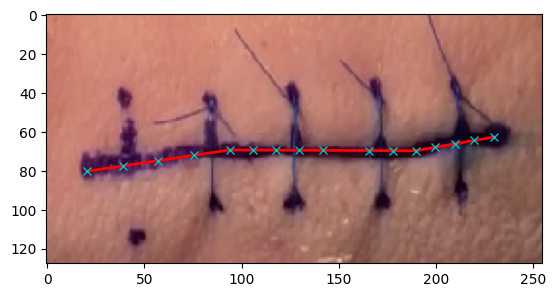

<Figure size 640x480 with 0 Axes>

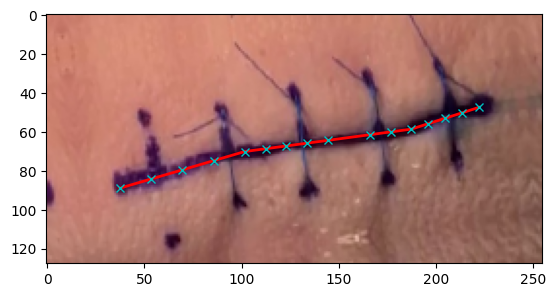

In [60]:
dataset = ZdoDataset(json_p)

img_id = '62'
image, incision = dataset.get_raw_item(img_id)

visualize(image,incision)

# augmentations

# blur transforms 
transform = A.Compose([
    A.OneOf([
    A.AdvancedBlur(blur_limit=(19,31), sigmaX_limit=(7,10), sigmaY_limit=(7,10), rotate_limit=90, beta_limit=(0.7, 1.6), noise_limit=(0.6,1.4), p=0.8),
    A.Blur(blur_limit=(17,33), p=0.8), 
    A.GaussianBlur(blur_limit=(21,45), p=0.8),
    A.MedianBlur(blur_limit=(23,49), p=0.8),
    A.MotionBlur(blur_limit=(29,57), p=0.8)
  ], p=1) 
], keypoint_params=A.KeypointParams(format='xy'))

# spatial transforms
# TODO: add vertical flip ... requires flipping the order of points as well
# TODO: handle when 
transform = A.Compose([
    # A.HorizontalFlip(p=0.5),
    # A.PiecewiseAffine(scale=(0.03, 0.05), p=1),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=20, p=1)
], keypoint_params=A.KeypointParams(format='xy'))

transformed = transform(image=image, keypoints=incision)
plt.figure()
visualize(transformed['image'], transformed['keypoints'])

tensor(-1., dtype=torch.float64) tensor(0.6719, dtype=torch.float64)


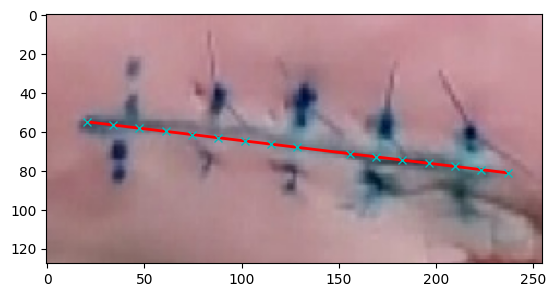

In [104]:
# define the transformations
transform = A.Compose([
    A.RandomBrightnessContrast(p=0.5),
    # to [-1,1]
    #A.transforms.Normalize(mean=[0,0,0], std=[1,1,1], max_pixel_value=255.0),  
], keypoint_params=A.KeypointParams(format='xy'))


dataset = ZdoDataset(json_p, transform=None)
# TODO: train val test into separate jsons
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

dataiter = iter(dataloader)
images, labels = next(dataiter)

print(images[0].min(), images[0].max())
# TODO: only incision supported atm
imvis = visualize_tensor(images[0], labels[0], unnormalize=True)